# Applied Data Science Capstone Project

<h2> Incindents of the State of Seattle </h2>

Before anything, import all the libaries that you will use along this project:

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium

Also, to acces the data, it is usefull to know the path where you are working:

In [2]:
import os
os.getcwd()

'/resources/labs/ADSC101EN/Capstone-Project/Scripts'

Let's check the columns of our data frame.

In [3]:
df_traffic = pd.read_csv("Data-Collisions.csv")
coldf = len(df_traffic.columns)
pd.set_option("display.max_columns", coldf)
pd.set_option('display.max_colwidth', None)
df_traffic.columns

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

A warning triggered on column 33 (ST_COLCODE), because differents data types were detected on it. Before changing the data type, we are going to replace de emnty rows to NaN values. Now, to avoid this message again in the future, we are going to change the data to float type as NaN only accepts this numerical type.

In [4]:
df_traffic["ST_COLCODE"].replace(" ", None, inplace = True)
df_traffic["ST_COLCODE"] = df_traffic["ST_COLCODE"].astype(float)
df_traffic.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

Taking a look to our data frame, two columns are identical: [SEVERITYCODE and SEVERITYCODE.1]. The second one is deleted.

In [5]:
df_traffic.drop(columns=["EXCEPTRSNDESC","EXCEPTRSNCODE","SEVERITYCODE.1"], inplace = True)
df_traffic.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

With the data types solved, we are going to create a need data frame to check what kind of information the columns give.

In [29]:
Att_info ={
    "SEVERITYCODE" : "A code that corresponds to the severity of the collision.",
    "X" : "North/South coordinate of the accident.",
    "Y" : "East/West coordinate of the accident.",
    "OBJECTID": "ESRI unique identifier.",
    "INCKEY" : "A unique key for the incident.",
    "COLDETKEY" : "Secondary key for the incident.",
    "REPORTNO" : "An unique identifier of the report,",
    "STATUS" : "Whether or not the collision is matched or not (Matched/Unmatched).",
    "ADDRTYPE" : "Collision address type: Alley, Block or intersection.",
    "INTKEY" : "Key that corresponds to the intersection associated with a collision.",
    "LOCATION" : "A general description of the location of the collision.",
    "SEVERITYDESC" : "A detailed description of the severity of the collision.",
    "COLLISIONTYPE" : "Type of collision.",
    "PERSONCOUNT" : "The total number of people involved in the collision.",
    "PEDCOUNT" : "The number of pedestrians involved in the collision. This is entered by the state.",
    "PEDCYLCOUNT" : "The number of bicycles involved in the collision. This is entered by the state.",
    "VEHCOUNT" : "The number of vehicles involved in the collision. This is entered by the state.",
    "INCDATE" : "Date of the incident.",
    "INCDTTM" : "Date and time of the incident.",
    "JUNCTIONTYPE" : "Category of junction at which collision took place.", 
    "SDOT_COLCODE" : "A code given to the collision by SDOT.",
    "SDOT_COLDESC" : "A description of the collision corresponding to the collision code.",
    "INATTENTIONIND" : "Whether or not collision was due to inattention. (Y/N)",
    "UNDERINFL" : "Whether or not a driver involved was under the influence of drugs or alcohol.",
    "WEATHER" : "A description of the weather conditions during the time of the collision.",
    "ROADCOND" : "The condition of the road during the collision.",
    "LIGHTCOND" : "The light conditions during the collision.",
    "PEDROWNOTGRNT" : "Whether or not the pedestrian right of way was not granted. (Y/N).",
    "SDOTCOLNUM" : "A number given to the collision by SDOT.",
    "SPEEDING" : "Whether or not speeding was a factor in the collision. (Y/N).",
    "ST_COLCODE" : "A code provided by the state that describes the collision. For more information about these codes, please see the State Collision Code Dictionary.",
    "ST_COLDESC" : "A description that corresponds to the state’s coding designation.",
    "SEGLANEKEY" : "A key for the lane segment in which the collision occurred.",
    "CROSSWALKKEY" : "A key for the crosswalk at which the collision occurred.",
    "HITPARKEDCAR" : "Whether or not the collision involved hitting a parked car. (Y/N)"
}
Att_info = pd.DataFrame(Att_info, index=["Code"]).transpose()
Att_info

,Code
SEVERITYCODE,A code that corresponds to the severity of the collision.
X,North/South coordinate of the accident.
Y,East/West coordinate of the accident.
OBJECTID,ESRI unique identifier.
INCKEY,A unique key for the incident.
COLDETKEY,Secondary key for the incident.
REPORTNO,"An unique identifier of the report,"
STATUS,Whether or not the collision is matched or not (Matched/Unmatched).
ADDRTYPE,"Collision address type: Alley, Block or intersection."
INTKEY,Key that corresponds to the intersection associated with a collision.


An additional data frame of the severity code was created:

In [7]:
Severity_Code ={
    0 : "Unknown",
    1 : "Prop damage",
    2 : "Injury",
    2.5 : "Serious injury",
    3 : "Fatality"
}
Severity = pd.DataFrame(Severity_Code, index=["Severity"]).transpose()
Severity

,Severity
0.0,Unknown
1.0,Prop damage
2.0,Injury
2.5,Serious injury
3.0,Fatality


To make it easy to check, all rows with X-Y coordinates and in ST-COLCOD without data or NaN values, will be erased.
<p> After reseting the index, the coordinates columns X-Y will be renamed due a typo on the information.

In [14]:
# Delete the rows which have NaN values on X, Y and ST_COLCODE
df_traffic.dropna(subset=["ST_COLCODE"], axis=0, inplace=True)
df_traffic.dropna(subset=["X"], axis=0, inplace=True)
df_traffic.dropna(subset=["Y"], axis=0, inplace=True)
# Reset the index after deleting rows.
df_traffic.reset_index(drop=True, inplace=True)
# Changes coordinate columns
df_traffic.rename({'X': 'Y', 'Y': 'X'}, axis=1, inplace=True)

With a cleaner version of the data frame, the severity code of all the incidents was checked.

In [27]:
df_code = (df_traffic["SEVERITYCODE"].value_counts(normalize=True))*100
df_code

1    69.836944
2    30.163056
Name: SEVERITYCODE, dtype: float64

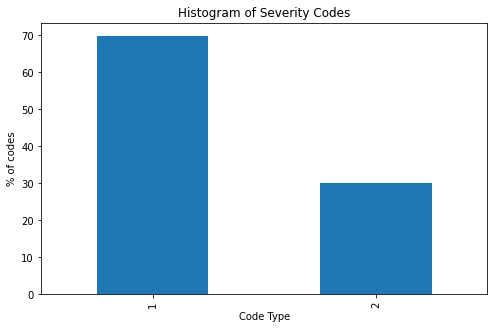

In [28]:
df_code.plot(kind='bar', figsize=(8, 5))

plt.title('Histogram of Severity Codes') # add a title to the histogram
plt.ylabel('% of codes') # add y-label
plt.xlabel('Code Type') # add x-label

plt.show()

On this data frame, only were reported the incidents with only props or injured people. None of the incidents where there were fatalities were reported in this report.
<p> The results are the following:</p>
 <p>    - Props damage: 69,84 %</p>
 <p>    - Injuries: 30,16 %</p>

In [32]:
df_traffic.columns

Index(['SEVERITYCODE', 'Y', 'X', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [33]:
df_traffic["WEATHER"].value_counts()

Clear                       108954
Raining                     32008 
Overcast                    27130 
Unknown                     13893 
Snowing                     894   
Other                       773   
Fog/Smog/Smoke              553   
Sleet/Hail/Freezing Rain    112   
Blowing Sand/Dirt           50    
Severe Crosswind            24    
Partly Cloudy               5     
Name: WEATHER, dtype: int64

In [49]:
Condition = ["Unknown", "Other"]
filt = df_traffic["WEATHER"].isin(Condition)
df_traffic.drop(index=df_traffic[filt].index, inplace = True) # Using the filtrer to acces the indexes of the rows you want to delete.

In [51]:
country_grp = df_traffic.groupby(["SEVERITYCODE"]) 

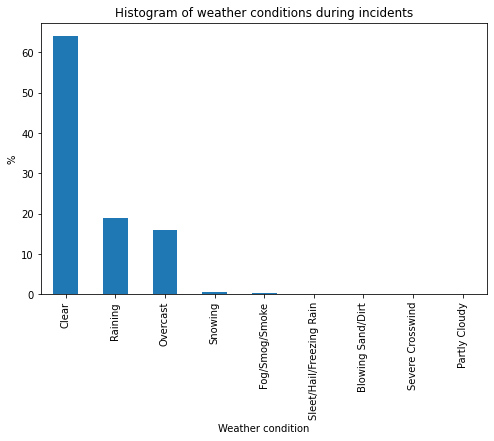

In [61]:
weather = country_grp["WEATHER"].value_counts(normalize=True).loc[1]*100
weather.plot(kind='bar', figsize=(8, 5))

plt.title('Histogram of weather conditions during incidents') # add a title to the histogram
plt.ylabel('%') # add y-label
plt.xlabel('Weather condition') # add x-label

plt.show()

In [65]:
country_grp = df_traffic.groupby(["SEVERITYCODE"]) 
# country_grp.get_group(1) 
country_grp["SDOT_COLCODE"].value_counts(normalize=True).loc[2]

SDOT_COLCODE
11    0.481560
14    0.280560
16    0.065992
28    0.051884
13    0.034296
0     0.026537
26    0.025507
15    0.009541
12    0.007818
24    0.005412
18    0.002980
51    0.001233
27    0.001072
29    0.000895
48    0.000785
31    0.000777
25    0.000692
34    0.000659
33    0.000431
21    0.000346
54    0.000262
23    0.000253
56    0.000152
32    0.000093
55    0.000084
35    0.000042
46    0.000025
64    0.000025
36    0.000017
53    0.000017
22    0.000008
47    0.000008
52    0.000008
66    0.000008
68    0.000008
69    0.000008
Name: SDOT_COLCODE, dtype: float64

In [96]:
df_traffic.dropna(subset=["ST_COLDESC"], axis=0, inplace=True)
filt_SDOT = (df_traffic["ST_COLCODE"] == 50)
df_traffic.loc[filt_SDOT,["ST_COLCODE","ST_COLDESC"]]

,ST_COLCODE,ST_COLDESC
5,50,Fixed object
9,50,Fixed object
16,50,Fixed object
23,50,Fixed object
27,50,Fixed object
...,...,...
174429,50,Fixed object
174430,50,Fixed object
174432,50,Fixed object
174433,50,Fixed object


In [122]:
df_traffic["UNDERINFL"].unique()

array(['1', '0', 'N', 'Y', nan], dtype=object)

In [125]:
df_traffic["UNDERINFL"].replace("N", 0, inplace = True)
df_traffic["UNDERINFL"].replace("Y", 1, inplace = True)
df_traffic.dropna(subset=["UNDERINFL"], axis=0, inplace=True)
df_traffic["UNDERINFL"] = df_traffic["UNDERINFL"].astype(bool)
df_traffic["UNDERINFL"].unique()

array([ True, False])

In [128]:
df_traffic["UNDERINFL"].value_counts(normalize=True)*100

False    52.85816
True     47.14184
Name: UNDERINFL, dtype: float64

In [129]:
df_traffic["STATUS"].unique()

array(['Matched', 'Unmatched'], dtype=object)

In [130]:
df_traffic["STATUS"].replace("Unmatched", 0, inplace = True)
df_traffic["STATUS"].replace("Matched", 1, inplace = True)
df_traffic.dropna(subset=["STATUS"], axis=0, inplace=True)
df_traffic["STATUS"] = df_traffic["STATUS"].astype(bool)
df_traffic["STATUS"].unique()

array([ True, False])

In [132]:
df_traffic["STATUS"].value_counts(normalize=True)*100

True     99.999411
False    0.000589 
Name: STATUS, dtype: float64

In [136]:
filt_Status = (df_traffic["STATUS"] == False)
df_traffic.drop(index=df_traffic[filt_Status].index, inplace = True)

In [137]:
df_traffic["STATUS"].value_counts(normalize=True)*100

True    100.0
Name: STATUS, dtype: float64

In [140]:
# Too much NaN values on that column. Will be deleted.
df_traffic["INATTENTIONIND"].isna().sum()

141514

In [142]:
df_traffic.drop(columns=["INATTENTIONIND"], inplace = True)

In [153]:
filt_ped = (df_traffic["PEDROWNOTGRNT"] == "Y")
df_traffic.loc[filt_ped,["ADDRTYPE","PEDROWNOTGRNT"]].value_counts(normalize=True)*100

ADDRTYPE      PEDROWNOTGRNT
Intersection  Y                80.749612
Block         Y                19.250388
dtype: float64

In [159]:
df_traffic["SPEEDING"].unique()

array([nan, 'Y'], dtype=object)

In [160]:
filt_speed = (df_traffic["SPEEDING"] == "Y")
df_traffic.loc[filt_speed,["ADDRTYPE","SPEEDING"]].value_counts(normalize=True)*100

ADDRTYPE      SPEEDING
Block         Y           77.804878
Intersection  Y           22.195122
dtype: float64

In [169]:
df_traffic["SPEEDING"].fillna("N",inplace=True)
df_traffic["SPEEDING"]
df_traffic["SPEEDING"].value_counts(normalize=True)

N    0.949328
Y    0.050672
Name: SPEEDING, dtype: float64

# Plotting nº accidens per year

First, check the INCDATE with the information of the date of each accident.

In [54]:
Att_info

,Code
SEVERITYCODE,A code that corresponds to the severity of the collision.
X,North/South coordinate of the accident.
Y,East/West coordinate of the accident.
OBJECTID,ESRI unique identifier.
INCKEY,A unique key for the incident.
COLDETKEY,Secondary key for the incident.
REPORTNO,"An unique identifier of the report,"
STATUS,Whether or not the collision is matched or not (Matched/Unmatched).
ADDRTYPE,"Collision address type: Alley, Block or intersection."
INTKEY,Key that corresponds to the intersection associated with a collision.


In [57]:
df_traffic["INCDATE"].head()

0    2013/03/27 00:00:00+00
1    2006/12/20 00:00:00+00
2    2004/11/18 00:00:00+00
3    2013/03/29 00:00:00+00
4    2004/01/28 00:00:00+00
Name: INCDATE, dtype: object

Change the format of the INCDATE column to a datetime format. Then, create a column with the year of each incident.
<p> Also, you need to set the index to INCDATE column to be able to resample in the future.

In [58]:
df_traffic["INCDATE"] = pd.to_datetime(df_traffic["INCDATE"], format = "%Y-%m-%d") 
df_traffic['Year'] = pd.DatetimeIndex(df_traffic['INCDATE']).year  
df_traffic.set_index("INCDATE", inplace = True)
# df_traffic.reset_index(inplace=True)
df_traffic.sort_index(inplace = True)

Then, resample the data frame, only picking the columns REPORTNO and Year, taking only the count and the mean respectively. Set a new index on Year column.

In [59]:
df_acc = df_traffic.resample("Y").agg({"Year":"mean","REPORTNO":"count"})
df_acc.set_index("Year", inplace = True)

Load the matplotlib necessary and the style and make a bar plot of the new data frame.

In [10]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

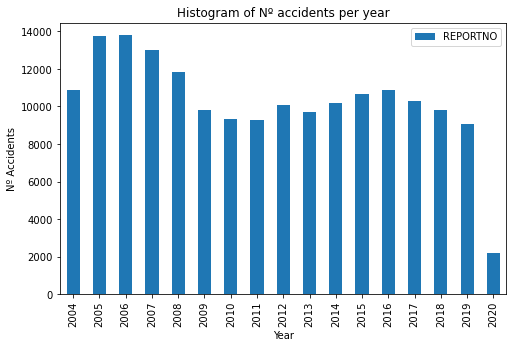

In [60]:
df_acc.plot(kind='bar', figsize=(8, 5))

plt.title('Histogram of Nº accidents per year') # add a title to the histogram
plt.ylabel('Nº Accidents') # add y-label
plt.xlabel('Year') # add x-label

plt.show()

As it can see in the plot, the incidents piked back at 2006, just before the finantial crisis explode on finals of 2007. Then, the incidents reports went down due the decrease of the traffic volume.
<p> After 2013, when the finantial situation started to improve again, a sligthly increase of the incidents can be observed, reaching a pike on 2015, but not as high as 2006.</p>
<p> Due the improvements of the active safety on vehicles and strong regulations on the state of Seattle, the nº of incidents reports start to gradualy decrease, archiveing a new low record on 2019, that it seems to brake it in 2020 due COVID-19 restrictions (last day of data 20-05-2020).

# Map of the accidents

In [18]:
limit = 1000
df_traffic100 = df_traffic.iloc[0:limit, :]

In [19]:
latitude= df_traffic100["X"].mean()
longitude=df_traffic100["Y"].mean()

In [21]:
# define the world map centered around Canada with a low zoom level
Seattle_map = folium.Map(location=[latitude, longitude], zoom_start=10)


In [22]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 incidents and add each to the incidents feature group
for lat, lng, in zip(df_traffic100.X, df_traffic100.Y):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Seattle_map.add_child(incidents)

In [52]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SEVERITYCODE    100 non-null    int64  
 1   X               96 non-null     float64
 2   Y               96 non-null     float64
 3   OBJECTID        100 non-null    int64  
 4   INCKEY          100 non-null    int64  
 5   COLDETKEY       100 non-null    int64  
 6   REPORTNO        100 non-null    object 
 7   STATUS          100 non-null    object 
 8   ADDRTYPE        99 non-null     object 
 9   INTKEY          36 non-null     float64
 10  LOCATION        98 non-null     object 
 11  EXCEPTRSNCODE   46 non-null     object 
 12  EXCEPTRSNDESC   1 non-null      object 
 13  SEVERITYCODE.1  100 non-null    int64  
 14  SEVERITYDESC    100 non-null    object 
 15  COLLISIONTYPE   95 non-null     object 
 16  PERSONCOUNT     100 non-null    int64  
 17  PEDCOUNT        100 non-null    int6

In [94]:
df_traffic.shape


(189321, 38)